In [10]:
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
data = load_iris()

In [3]:
import pandas as pd
df = pd.DataFrame(data = data.data,columns=data.feature_names)
df.head()

df.drop(['sepal length (cm)','sepal width (cm)'],inplace=True,axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


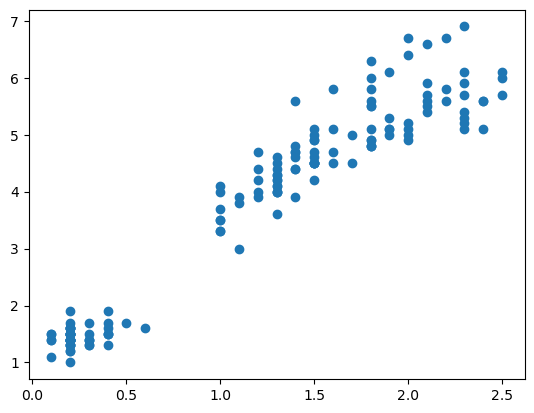

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
df['cluster'] = model.fit_predict(df[['petal width (cm)','petal length (cm)']])

D:\all programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\all programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


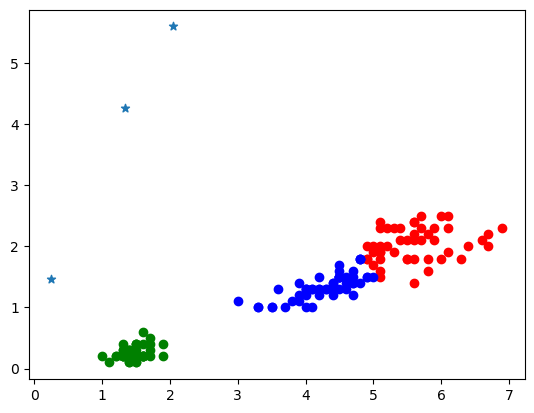

In [7]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]


plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*')

In [11]:
sse = []
for i in range(1,11):
    model2 = KMeans(n_clusters=i)
    model2.fit_predict(df[['petal width (cm)','petal length (cm)']])
    sse.append(model2.inertia_)

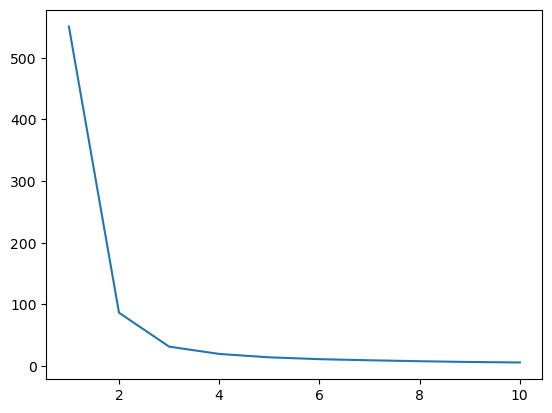

In [12]:
plt.plot(range(1,11),sse)

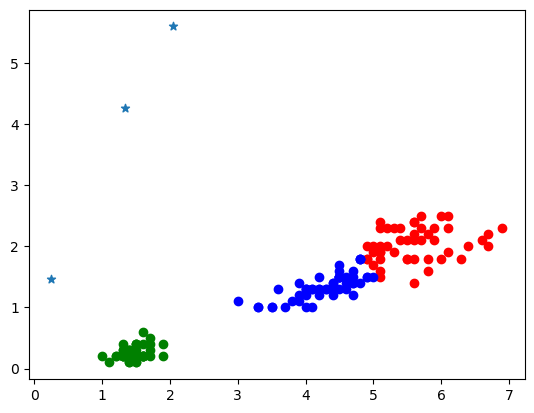

In [18]:
dfx = pd.DataFrame(data = data.data,columns=data.feature_names)
dfx.head()

dfx.drop(['sepal length (cm)','sepal width (cm)'],inplace=True,axis='columns')
dfx.head()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfx['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
dfx['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

model3 = KMeans(n_clusters=3)
dfx['cluster'] = model3.fit_predict(df[['petal width (cm)','petal length (cm)']])

df0x = df[df['cluster']==0]
df1x = df[df['cluster']==1]
df2x = df[df['cluster']==2]


plt.scatter(df0x['petal length (cm)'],df0x['petal width (cm)'],color='red')
plt.scatter(df1x['petal length (cm)'],df1x['petal width (cm)'],color='green')
plt.scatter(df2x['petal length (cm)'],df2x['petal width (cm)'],color='blue')
plt.scatter(model3.cluster_centers_[:,0],model3.cluster_centers_[:,1],marker='*')
